<a href="https://colab.research.google.com/github/lee-messi/machine-learning/blob/main/amazon-reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_hub
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 61.6 MB/s eta 0:00:00


## Import all packages

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import matplotlib.pyplot as plt

## Preprocess Amazon Review Data

In [37]:
df = pd.read_json('drive/MyDrive/Colab Notebooks/BERT/Prime_Pantry_5.json', lines = True)

In [38]:
df = df[['reviewText', 'overall']]
df = df.dropna()
df.overall = df.overall - 1
df.overall = df.overall.astype('category')

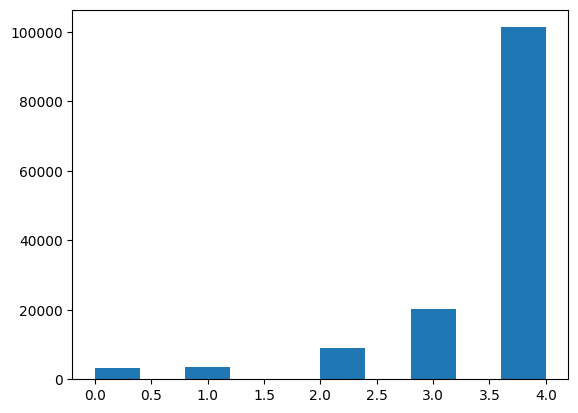

In [39]:
plt.hist(df.overall)
plt.show()

In [40]:
df_balanced = df.groupby(df.overall).sample(1000)

In [41]:
train, val, test = np.split(df_balanced.sample(frac = 1), [int(0.8 * len(df_balanced)), int(0.9 * len(df_balanced))])

In [42]:
'{}{}{}'.format(train.shape, val.shape, test.shape)

'(4000, 2)(500, 2)(500, 2)'

Create a tf.data Dataset from a Pandas Dataframe

In [43]:
def df_to_dataset(dataframe, shuffle = True, batch_size = 128):
  df = dataframe.copy()
  label = df.overall
  df = df.reviewText
  ds = tf.data.Dataset.from_tensor_slices((df, label))
  if shuffle == True:
    ds = ds.shuffle(buffer_size = len(df))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return(ds)

In [44]:
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val)
test_ds = df_to_dataset(test)

Define, Compile, and Fit Model

In [22]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype = tf.string, trainable = True)

In [58]:
model = tf.keras.models.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(5, activation = 'softmax'))

In [59]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = ['accuracy'])

In [60]:
model.evaluate(train_ds)

32/32 [==============================] - 6s 177ms/step - loss: 1.6381 - accuracy: 0.1755


[1.6380866765975952, 0.17550000548362732]

In [61]:
history = model.fit(train_ds,
                    epochs = 7,
                    validation_data = val_ds)

Epoch 1/7
32/32 [==============================] - 40s 1s/step - loss: 1.1519 - accuracy: 0.6550 - val_loss: 1.4978 - val_accuracy: 0.3940
Epoch 2/7
32/32 [==============================] - 40s 1s/step - loss: 0.4261 - accuracy: 0.8917 - val_loss: 1.8032 - val_accuracy: 0.3940
Epoch 3/7
32/32 [==============================] - 40s 1s/step - loss: 0.2511 - accuracy: 0.9190 - val_loss: 2.1277 - val_accuracy: 0.4000
Epoch 4/7
32/32 [==============================] - 38s 1s/step - loss: 0.1959 - accuracy: 0.9352 - val_loss: 2.4435 - val_accuracy: 0.4000
Epoch 5/7
32/32 [==============================] - 40s 1s/step - loss: 0.1673 - accuracy: 0.9457 - val_loss: 2.6020 - val_accuracy: 0.3840
Epoch 6/7
32/32 [==============================] - 39s 1s/step - loss: 0.1500 - accuracy: 0.9488 - val_loss: 2.7854 - val_accuracy: 0.3820
Epoch 7/7
32/32 [==============================] - 39s 1s/step - loss: 0.1409 - accuracy: 0.9477 - val_loss: 2.9824 - val_accuracy: 0.3840


In [62]:
model.evaluate(test_ds)

4/4 [==============================] - 1s 165ms/step - loss: 3.0483 - accuracy: 0.3680


[3.048326253890991, 0.36800000071525574]

Plot Train and Validation Accuracy of the Model

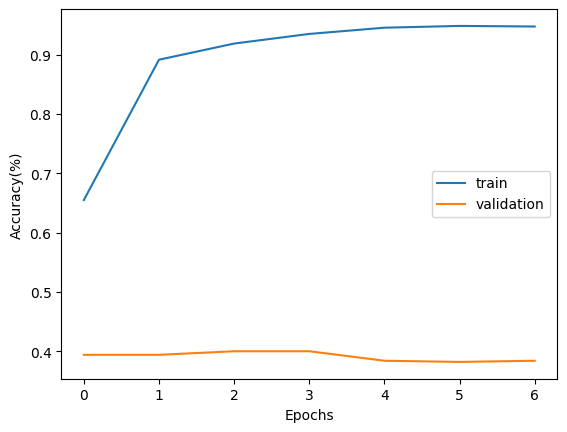

In [63]:
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.xlabel('Epochs')
 plt.ylabel('Accuracy(%)')
 plt.legend(['train', 'validation'])
 plt.show()

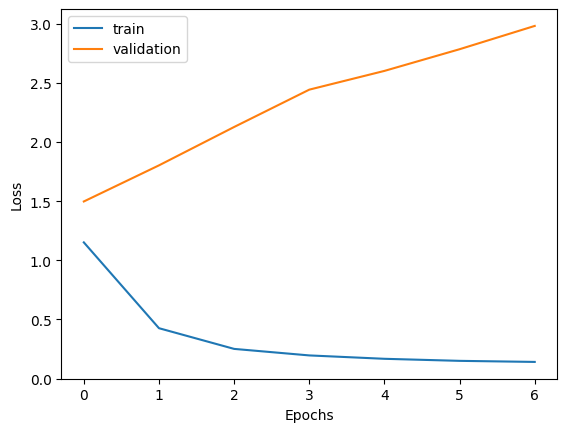

In [64]:
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.xlabel('Epochs')
 plt.ylabel('Loss')
 plt.legend(['train', 'validation'])
 plt.show()